<a href="https://colab.research.google.com/github/sheha919/Food-sales-predictions/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [190]:
filename='/content/sales_predictions.csv'
df=pd.read_csv(filename)

In [191]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploring Data types

In [192]:
# rows and the columns of the dataframe
df.shape

(8523, 12)

In [193]:
# data type of the variables
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Data Cleaning

## Looking for duplicates

In [194]:
df.duplicated().sum()

0

no duplicates

## Identify missing values

In [195]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [196]:
#checking the missing values in 'Outlet_size' column
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [197]:
#fill those missing values with ‘other’ in 'Outlet_Size' column
df['Outlet_Size'].fillna('Other', inplace= True)
df['Outlet_Size'].value_counts()

Medium    2793
Other     2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [198]:
#checking the missing values in 'Item_Weight' column
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

## Filling the missing data

In [199]:
#fill those missing values with median of 'Item_Weight' column
median_weight=df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight,inplace= True)
df['Item_Weight'].value_counts()

12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64

In [200]:
#checking for missing values again
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Fixing any inconsistent categories of data

In [201]:
data_types=df.dtypes
data_types[data_types=='object']

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [202]:
#checking 'Item_Identifier' column
df['Item_Identifier'].nunique()

1559

In [203]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [204]:
#checking 'Item_Fat_Content' column
df['Item_Fat_Content'].nunique()

5

In [205]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [206]:
# replacing inconsistent items in 'Item_Fat_Content'
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['LF', 'low fat'],'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [207]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [208]:
#checking 'Item_Type' column
df['Item_Type'].nunique()

16

In [209]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [210]:
#checking 'Outlet_Identifier' column
df['Outlet_Identifier'].nunique()

10

In [211]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [212]:
#checking 'Outlet_Size' column
df['Outlet_Size'].value_counts()

Medium    2793
Other     2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [213]:
#checking 'Outlet_Location_Type' column
df['Outlet_Location_Type'].nunique()

3

In [214]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [215]:
#checking 'Outlet_Type' column
df['Outlet_Type'].nunique()

4

In [216]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Calculating Statistics

In [217]:
# summary statistics
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


# Statistical Analyses

In [218]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Univarient Analysis

In [219]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

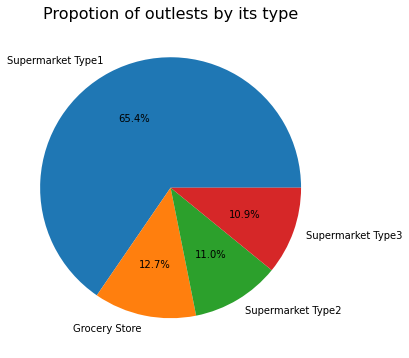

In [220]:
plt.figure(figsize=[6,6])
labels_ot=['Supermarket Type1','Grocery Store','Supermarket Type2','Supermarket Type3']
plt.pie(df['Outlet_Type'].value_counts(),labels=labels_ot, autopct='%0.1f%%')
plt.title('Propotion of outlests by its type', fontsize=16);

From the sample data, majority are from Supermarket type 1 while least contribution from supermartket type 3

Text(0.5, 1.0, 'Distribution of Item Market Retail Price')

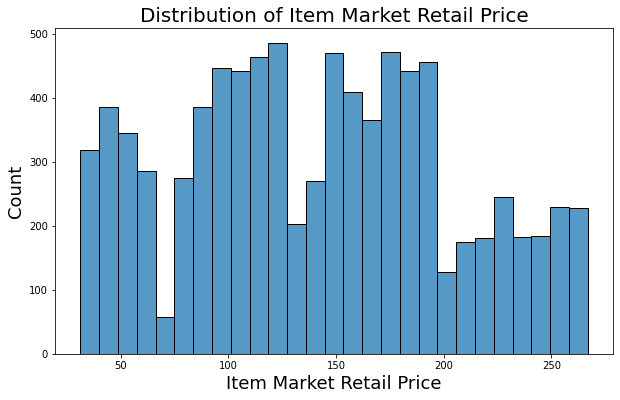

In [221]:
plt.figure(figsize=[10,6])
sns.histplot(x='Item_MRP', data=df, bins='auto')
plt.ylabel('Count', fontsize=18)
plt.xlabel('Item Market Retail Price', fontsize=18)
plt.title('Distribution of Item Market Retail Price',fontsize=20)


Above histogram shows the distribution of MRP values of items. The item appproximately above 200 MRP is lower comparative to MRP below 200. 
The maximum number of items are in between ~ 120 and ~ 130 MRP

Text(0.5, 1.0, 'Distribution of Item Sales in Outlets')

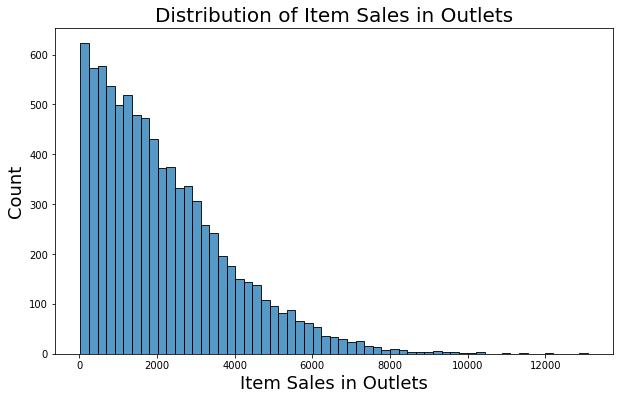

In [222]:
plt.figure(figsize=[10,6])
sns.histplot(x='Item_Outlet_Sales', data=df, bins='auto')
plt.ylabel('Count', fontsize=18)
plt.xlabel('Item Sales in Outlets', fontsize=18)
plt.title('Distribution of Item Sales in Outlets',fontsize=20)

According to the above histogram, item sales in particular outlet has right skewed distribution

# Multivarient Analysis

Text(0.5, 1.0, 'Total sales for each item')

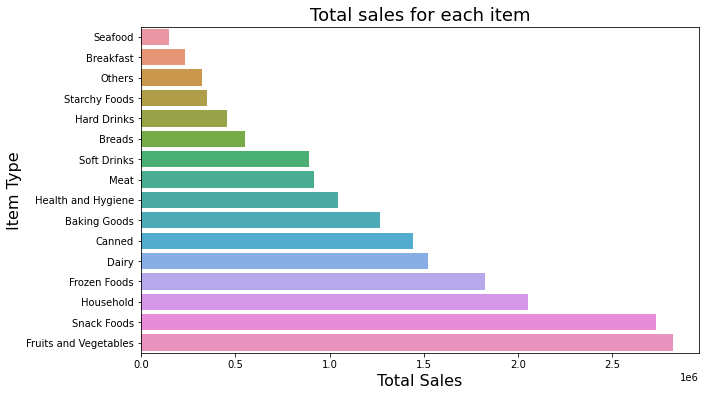

In [223]:
total_sales_byitem=df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values()

plt.figure(figsize=[10,6])
sns.barplot(y= total_sales_byitem.index, x=total_sales_byitem.values)
plt.ylabel('Item Type', fontsize=16)
plt.xlabel('Total Sales',fontsize=16 )
plt.title('Total sales for each item', fontsize=18)

Fruits and vegetables has the highest sales from all types of outlets while seafood has the lowest.

Text(0.5, 0, 'Total Sales')

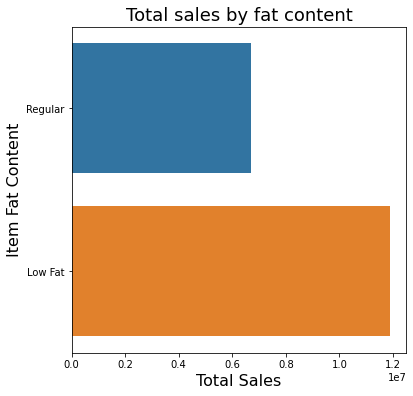

In [224]:
total_sales_byfat=df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().sort_values()


plt.figure(figsize=[6,6])
sns.barplot(y= total_sales_byfat.index, x=total_sales_byfat.values)
plt.title('Total sales by fat content', fontsize=18)
plt.ylabel('Item Fat Content', fontsize=16)
plt.xlabel('Total Sales',fontsize=16)

Sales of low fat items is higher than regular fat food items in all types of outlets

Text(0.5, 1.0, 'Total sales by outlet type')

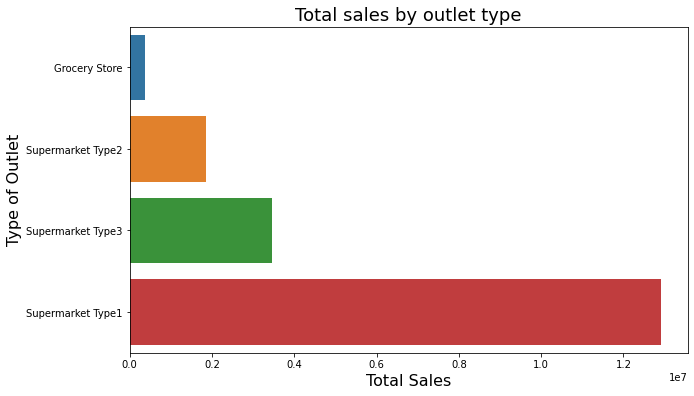

In [225]:
total_sales_byoutlet=df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values()

plt.figure(figsize=[10,6])
sns.barplot(x=total_sales_byoutlet.values , y=total_sales_byoutlet.index)
plt.ylabel('Type of Outlet', fontsize=16)
plt.xlabel('Total Sales',fontsize=16 )
plt.title('Total sales by outlet type', fontsize=18)

The supermaket type1 has the highest total sales while grocery store has the lowest total sales

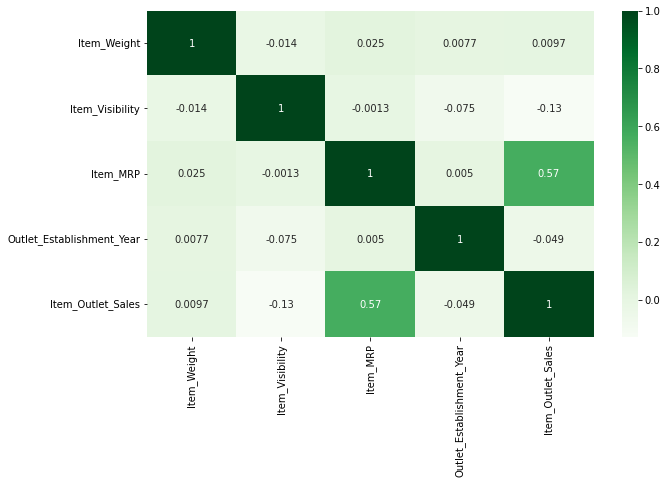

In [226]:
corr = df.corr()

plt.figure(figsize=[10,6])
sns.heatmap(corr, cmap='Greens',annot=True)

The highest correlations is occurred between MRP of items and item sales in outlet which is true. All the other columns are poorly correlated with other coulumns.

Text(0.5, 1.0, 'Distribution of Sales for different types of outlets')

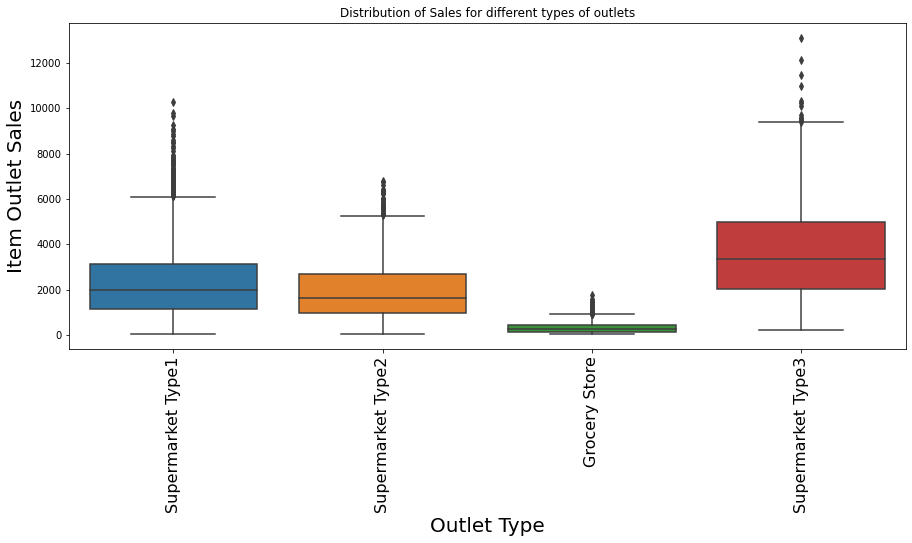

In [227]:
plt.figure(figsize=[15,6])
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=90, fontsize=16)
plt.xlabel('Outlet Type', fontsize=20)
plt.ylabel('Item Outlet Sales', fontsize=20)
plt.title('Distribution of Sales for different types of outlets')

The highest range of sales for items is gained by Supermarket type3 while grocery store has the lowest range ofsales for items. 

# Explanatory Data Visualization

In [228]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Text(0.5, 1.0, 'Total sales by outlet size')

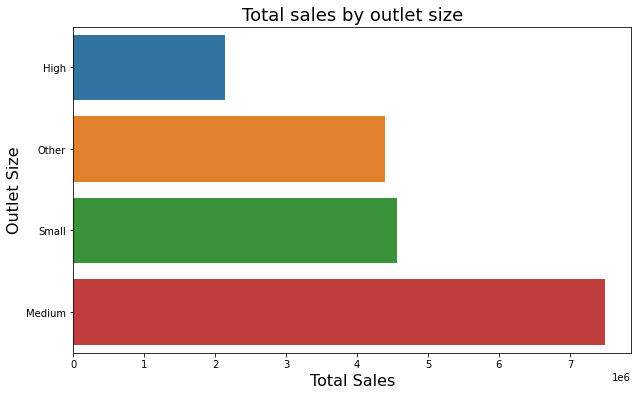

In [336]:
#total sales by outlet size
total_sales_byoutsize=df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values()

plt.figure(figsize=[10,6])
sns.barplot(x=total_sales_byoutsize.values , y=total_sales_byoutsize.index)
plt.ylabel('Outlet Size', fontsize=16)
plt.xlabel('Total Sales',fontsize=16 )
plt.title('Total sales by outlet size', fontsize=18)

**Interpretation**

- According to the above graph, the maximum amount of total sales obtained from medium sized outlets while minimum amount of total sales obtained from high sized outlets. 
- This is because the products can be easily accessible and at the same time showcasing the items to customers productively when the outlet size is in the medium range.

**Recommendations**

-So it is recommended to have medium sized outlets to maximize sales.

In [337]:
#the total amount of sales
total_sales=df['Item_Outlet_Sales'].sum()

In [338]:
# calculating percentage value of total sales 
percentage_sales_byfat=total_sales_byfat/total_sales*100          #by fat content
percentage_sales_byoutlet=total_sales_byoutlet/total_sales*100    #by outlet type
percentage_sales_byoutsize=total_sales_byoutsize/total_sales*100  #by outlet size

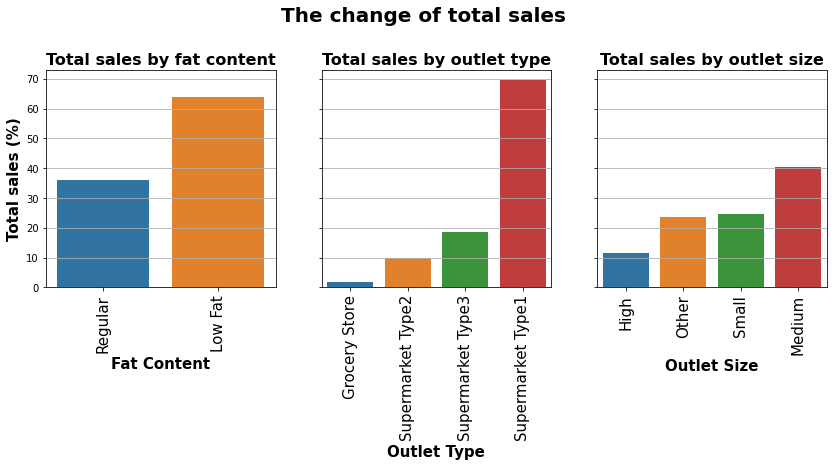

In [340]:
#plot of total sales percentages when it catergerozied by fat content, outlet type and outlet size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4), sharey=True)

#subplot1
sns.barplot(x=percentage_sales_byfat.index, y=percentage_sales_byfat.values,ax=axes[0])
axes[0].set_xticklabels(rotation=90, labels=percentage_sales_byfat.index, fontsize=15)
axes[0].set_title('Total sales by fat content', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Fat Content', fontsize=15, fontweight='bold')
axes[0].set_ylabel('Total sales (%)', fontsize=15, fontweight='bold')

#subplot2
sns.barplot(x=percentage_sales_byoutlet.index, y=percentage_sales_byoutlet.values,ax=axes[1])
axes[1].set_xticklabels(rotation=90, labels=percentage_sales_byoutlet.index, fontsize=15)
axes[1].set_title('Total sales by outlet type', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Outlet Type', fontsize=15, fontweight='bold')

#subplot3
sns.barplot(x=percentage_sales_byoutsize.index, y=percentage_sales_byoutsize.values,ax=axes[2])
axes[2].set_xticklabels(rotation=90, labels=percentage_sales_byoutsize.index, fontsize=15)
axes[2].set_title('Total sales by outlet size', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Outlet Size', fontsize=15, fontweight='bold')



fig.suptitle('The change of total sales', fontsize = 20, fontweight = 'bold', y = 1.1)
[ax.grid(axis='y') for ax in axes];



**Interpretation**

The above diagrom illustrates the total sales as percentage values when it catergorized according to fat content, outlet type and outlet size. The maximum sales obtained from;
- items contain with low fat according to subplot 1
- supermarket type 1 according to subplot 2
- medium size outlets according to subplot 3  

**Recommendations**
- According to this data analysis, I suggest to increase the stock of low fat items in medium sized supermarket type 1s to maximize the sales comparative to other outlets



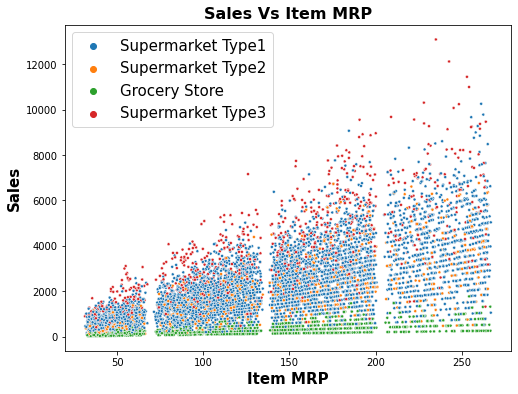

In [342]:
#distribution of sales vs item MRP

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', marker='.',hue='Outlet_Type')
plt.xlabel('Item MRP', fontsize=15, weight='bold')
plt.ylabel('Sales', fontsize=15, weight='bold')
plt.title('Sales Vs Item MRP', fontsize=16, weight='bold')
plt.legend(fontsize=15);

- According to the above plot, the minimum amount of sales occurred in grocery stores through all the range of MRP values. 